# SRP Dataset Analysis

Dump of DB dati_ais_with_ts on CSV
`COPY (
SELECT date_time,mmsi,course,speed,heading,a,b,c,d,ST_X (ST_Transform (geom, 4326)) as longitude, ST_Y (ST_Transform (geom, 4326)) as latitude,source FROM ais_data
) TO '/home/angelica/ais_data_small.csv' WITH CSV HEADER DELIMITER ',';`
This notebook analyses the dataset ais_data_clean contained in the postgres database dati_ais2.

In [8]:
!ipython --cache-size=5

]0;IPython: Code/SRPPython 3.8.1 (v3.8.1:1b293b6006, Dec 18 2019, 14:08:53) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.12.0 -- An enhanced Interactive Python. Type '?' for help.

C ?7h0mIn [1]:                                                                        In [1]:                                                                        

?7lIn [1]:                                                                        

# Cleaning
* speed less than 0.1
* speed greater than 60 - capire quanti dati sono e se correggere
* data related to bosforo (data 2015-12-27)
* heading > 360 - capire quanti sono e se correggere
* records where a mmsi is present only once

In [2]:
import pandas as pd
df = pd.read_csv('source/ais_data_clean_ts.csv')
df.shape

(76039396, 11)

In [3]:
df.columns

Index(['Unnamed: 0', 'date_time', 'mmsi', 'course', 'speed', 'a', 'b', 'c',
       'd', 'longitude', 'latitude'],
      dtype='object')

In [4]:
df.drop(columns=['Unnamed: 0'], axis=1,inplace=True)

In [5]:
df.head()

,date_time,mmsi,course,speed,a,b,c,d,longitude,latitude
0,2017-09-06 08:13:15+00:00,247144390,46.0,3.2,10.0,15.0,2.0,5.0,12.68286,37.23098
1,2017-09-06 08:13:15+00:00,247100100,96.0,0.9,12.0,60.0,10.0,6.0,12.69433,33.75967
2,2017-09-06 08:04:09+00:00,247300080,154.0,9.0,8.0,14.0,2.0,3.0,12.70149,35.52302
3,2017-09-06 08:12:14+00:00,247305840,213.0,0.5,8.0,13.0,2.0,4.0,12.70958,36.91732
4,2017-09-06 08:02:08+00:00,247306530,202.0,2.5,11.0,11.0,3.0,2.0,12.73139,36.90751


In [6]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [7]:
df['date_time'].min()

Timestamp('2016-07-06 09:00:36+0000', tz='UTC')

In [8]:
df['date_time'].max()

Timestamp('2017-12-24 21:59:32+0000', tz='UTC')

In [6]:
df.head(10)

,date_time,mmsi,course,speed,heading,a,b,c,d,longitude,latitude
0,2016-11-06 21:42:31,538080045,249.1,0.0,251.0,32.0,9.0,5.0,5.0,14.51926,35.89016
1,2016-11-06 21:42:31,249649000,242.4,0.0,511.0,18.0,8.0,3.0,3.0,14.51977,35.88864
2,2016-11-06 21:42:31,247314300,289.3,0.2,188.0,211.0,32.0,26.0,16.0,14.88120,35.96471
3,2016-11-06 21:42:32,256574000,347.2,0.0,511.0,13.0,12.0,4.0,3.0,14.51881,35.88835
4,2016-11-06 21:42:32,248000285,350.9,1.1,511.0,6.0,6.0,2.0,2.0,14.55202,35.82655
5,2016-11-06 21:42:33,373753000,360.0,0.0,511.0,20.0,17.0,4.0,4.0,14.50303,35.88059
6,2016-11-06 21:42:34,232883000,323.5,0.0,232.0,40.0,55.0,11.0,4.0,14.51668,35.89147
7,2016-11-06 21:42:34,256051000,56.4,0.1,511.0,16.0,15.0,5.0,6.0,14.54231,35.81631
8,2016-11-06 21:42:35,249000903,173.3,0.0,511.0,0.0,32.0,0.0,6.0,14.50160,35.88061
9,2016-11-06 21:42:35,241315000,73.0,0.2,150.0,189.0,39.0,12.0,20.0,14.91068,36.00818


In [15]:
df.describe()

,mmsi,course,speed,a,b,c,d,longitude,latitude
count,1.837082e+07,1.837082e+07,1.837082e+07,1.837082e+07,1.837082e+07,1.837082e+07,1.837082e+07,1.837082e+07,1.837082e+07
mean,3.625244e+08,1.851212e+02,8.487151e-01,1.171460e+02,4.268572e+01,1.295987e+01,1.263577e+01,1.405974e+01,3.602681e+01
std,1.463821e+08,9.935053e+01,6.394008e-01,7.132031e+01,4.582675e+01,7.446013e+00,7.704603e+00,1.320269e+00,8.701592e-01
min,1.112471e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.971340e+00,3.231069e+01
25%,2.472788e+08,1.050000e+02,0.000000e+00,6.500000e+01,1.900000e+01,7.000000e+00,7.000000e+00,1.348407e+01,3.582253e+01
50%,3.048140e+08,1.780000e+02,1.000000e+00,1.220000e+02,3.000000e+01,1.100000e+01,1.100000e+01,1.455755e+01,3.599202e+01
75%,5.186820e+08,2.847000e+02,1.000000e+00,1.620000e+02,4.400000e+01,1.800000e+01,1.700000e+01,1.486062e+01,3.643581e+01
max,7.812418e+08,4.065000e+02,3.000000e+00,5.110000e+02,5.110000e+02,6.300000e+01,6.300000e+01,1.606201e+01,3.774155e+01


# Normalization 
* Discretize columns
* Standardization columns (this is done to give the same weight to every feature): three techniques available simple feature scaling, min-max, z-score

Discretize speed and course

In [9]:
def get_discretized_speed(speed):
    # speed class
    sc = 0 # slow - speed between 0.5 and 3
    if speed > 3 and speed <= 14:
        sc = 1 # medium
    elif speed > 14 and speed <= 23:
        sc = 2 # high
    elif speed > 23 and speed <= 60:
        sc = 3 # very high
    elif speed > 60:
        sc = 4 # exception
    return sc 

In [10]:
def get_discretized_course(course):
    # course class
    cc = 0 # nord 337.5 - 22.5
    if course > 22.5 and course <= 67.5:
        cc = 1
    elif course > 67.5 and course <= 112.5:
        cc = 2
    elif course > 112.5 and course <= 157.5:
        cc = 3
    elif course > 157.5 and course <= 202.5:
        cc = 4
    elif course > 202.5 and course <= 247.5:
        cc = 5
    elif course > 247.5 and course <= 292.5:
        cc = 6
    elif course > 292.5 and course <= 337.5:
        cc = 7
    return cc

In [11]:
def get_basic_class(length):
    small_ship_length = 50.0 
    small_ship_width = 6.0 # 6-8
    big_ship_length = 51.0
    big_ship_width = 15.0
    if length <= small_ship_length:
        return 0 # small ship class 0
    if length >= big_ship_length:
        return 1 # big ship class 2
    return 2 # medium ship class 1

In [12]:
df['speed'] = df['speed'].apply(get_discretized_speed)

Text(0.5, 1.0, 'Speed Distribution')

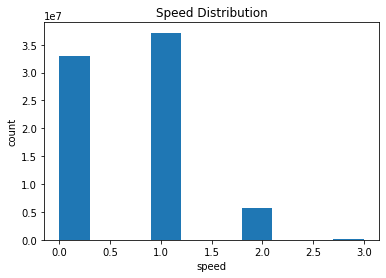

In [13]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["speed"])

# set x/y labels and plot title
plt.pyplot.xlabel("speed")
plt.pyplot.ylabel("count")
plt.pyplot.title("Speed Distribution")

In [14]:
df['course'] = df['course'].apply(get_discretized_course)

Text(0.5, 1.0, 'Course Distribution')

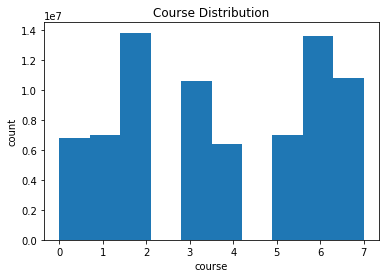

In [15]:
plt.pyplot.hist(df["course"])

# set x/y labels and plot title
plt.pyplot.xlabel("course")
plt.pyplot.ylabel("count")
plt.pyplot.title("Course Distribution")

Get class

In [16]:
df['length'] = abs(df['b'] + df['a'])

In [17]:
df['width'] = abs(df['c'] + df['d'])

In [18]:
df['class'] = df['length'].apply(get_basic_class)

In [19]:
df.drop(columns=['a', 'b','c','d'], axis=1,inplace=True)

In [20]:
df.drop(columns=['width', 'length'], axis=1,inplace=True)

In [68]:
df.head(10)

,date_time,mmsi,course,speed,longitude,latitude,class
0,2016-11-06 21:42:31,247314300,6,0,14.88120,35.96471,1
1,2016-11-06 21:42:35,241315000,2,0,14.91068,36.00818,1
2,2016-11-06 21:42:37,212339000,7,0,10.83956,34.67698,1
3,2016-11-06 21:42:37,255805623,3,0,14.86638,35.77951,1
4,2016-11-06 21:42:39,304634000,2,1,15.66044,35.86181,1
5,2016-11-06 21:42:44,304095000,5,0,15.28759,32.36729,1
6,2016-11-06 21:42:45,371158000,1,0,15.36713,35.48793,1
7,2016-11-06 21:42:50,250002045,4,0,14.43508,35.99266,1
8,2016-11-06 21:42:54,248922000,0,0,14.77100,36.04500,1
9,2016-11-06 21:42:54,205696000,6,0,14.83792,35.91907,1


Standardize course and speed. Use simple scaling

In [21]:
df['course'] = df['course']/df['course'].max()

In [22]:
df['speed'] = df['speed']/df['speed'].max()

In [24]:
df.head(10)

,date_time,mmsi,course,speed,longitude,latitude,class
0,2017-09-06 08:13:15+00:00,247144390,0.142857,0.333333,12.68286,37.23098,0
1,2017-09-06 08:13:15+00:00,247100100,0.285714,0.000000,12.69433,33.75967,1
2,2017-09-06 08:04:09+00:00,247300080,0.428571,0.333333,12.70149,35.52302,0
3,2017-09-06 08:12:14+00:00,247305840,0.714286,0.000000,12.70958,36.91732,0
4,2017-09-06 08:02:08+00:00,247306530,0.571429,0.000000,12.73139,36.90751,0
5,2017-09-06 08:09:12+00:00,247140710,0.857143,0.333333,12.75640,37.07140,0
6,2017-09-06 08:13:15+00:00,247140880,0.857143,0.000000,12.75964,37.06241,0
7,2017-09-06 08:12:14+00:00,247147950,0.428571,0.333333,12.76250,37.13440,0
8,2017-09-06 08:13:15+00:00,247090600,0.142857,1.000000,12.77867,35.70450,0
9,2017-09-06 07:58:05+00:00,305665000,0.857143,0.000000,12.79081,33.77640,1


In [23]:
df.to_csv('source/ais_data_discretized.csv')

# Deduplicate

In [ ]:
df.drop_duplicates(subset=['date_time', 'mmsi', 'course', 'speed', 'longitude', 'latitude', 'class'],inplace=True)
df.to_csv('source/ais_data_deduplicated.csv')

In [6]:
df = pd.read_csv('source/ais_data_deduplicated.csv')
df.dropna(inplace=True)
df.shape

(38017576, 8)